# Customer Purchase Patterns – Mini E-commerce Analysis using Apriori Algorithm

In [ ]:
Project Overview:

Analyze a small dataset of online transactions to:

1) Understand buying patterns

2) Identify frequent itemsets (Apriori)

In [1]:
transactions = [
    ['laptop', 'mouse'],
    ['laptop', 'mouse', 'bag'],
    ['mouse', 'headphones'],
    ['laptop', 'bag'],
    ['laptop', 'mouse', 'headphones'],
    ['bag', 'headphones'],
    ['mouse'],
    ['laptop', 'mouse', 'keyboard'],
    ['keyboard', 'monitor'],
    ['monitor', 'headphones']
]

# Step 1: Preprocessing

In [5]:
# Use TransactionEncoder to convert the list into a DataFrame of True/False values.


import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

#Create an encoder object

te = TransactionEncoder()

#fit and transform

encoded_data = te.fit(transactions).transform(transactions)

#creating dataframe
df = pd.DataFrame(encoded_data, columns=te.columns_)
df


,bag,headphones,keyboard,laptop,monitor,mouse
0,False,False,False,True,False,True
1,True,False,False,True,False,True
2,False,True,False,False,False,True
3,True,False,False,True,False,False
4,False,True,False,True,False,True
5,True,True,False,False,False,False
6,False,False,False,False,False,True
7,False,False,True,True,False,True
8,False,False,True,False,True,False
9,False,True,False,False,True,False


# Step 2: Apply Apriori algorithm

In [30]:
# Find frequent itemsets with minimum support (say 0.3)

frequent_itemsets = apriori(df, min_support = 0.3, use_colnames = True)
print("Frequent Itemsets:", frequent_itemsets)

# min_support=0.5
# This means:

# Only include itemsets that appear in at least 50% of transactions.

# If you have 10 transactions, only itemsets that appear in 3 or more will be included.

# This is a filter to remove rare combinations and focus on frequent ones.


# use_colnames=True
# This tells the Apriori function to:

# Show the actual item names in the results (like 'jeans', 't-shirt')

# Instead of showing column indices like {0, 1}.

Frequent Itemsets:    support         itemsets
0      0.3            (bag)
1      0.4     (headphones)
2      0.5         (laptop)
3      0.6          (mouse)
4      0.4  (mouse, laptop)


# Step 3: Generate Association Rules

In [31]:
#Now that you have frequent itemsets, let's extract rules such as:

# “If a customer buys mouse, they are also likely to buy laptop.”


from mlxtend.frequent_patterns import association_rules

# Generate rules from the frequent itemsets
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)

# Select only support, confidence, and lift columns
selected_metrics = rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

# Display the filtered rules
selected_metrics

,antecedents,consequents,support,confidence,lift
0,(mouse),(laptop),0.4,0.666667,1.333333
1,(laptop),(mouse),0.4,0.800000,1.333333


# Step 4: Visualization

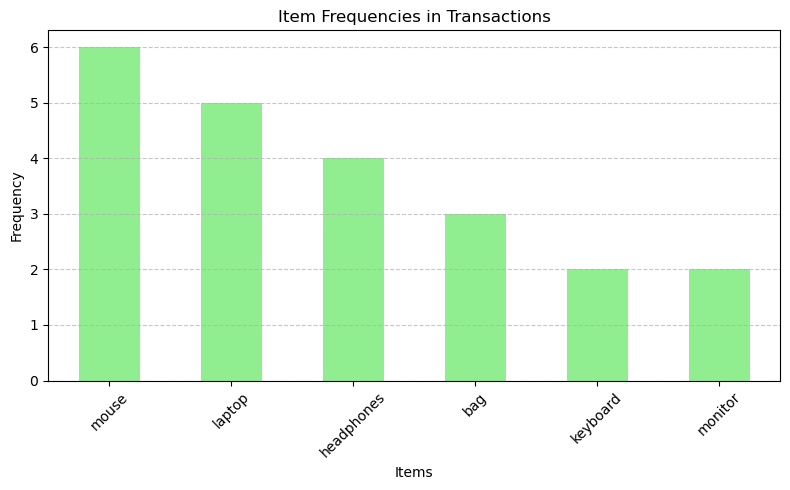

In [39]:
import matplotlib.pyplot as plt

# Step 1: Calculate item frequency (i.e., sum of True values for each item)
item_frequencies = df.sum().sort_values(ascending=False)

# Step 2: Plot bar chart
plt.figure(figsize=(8, 5))
item_frequencies.plot(kind='bar', color='lightgreen')
plt.title('Item Frequencies in Transactions')
plt.xlabel('Items')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Project Conclusion: Market Basket Analysis using Apriori Algorithm

# Key Findings:

In [ ]:
Frequent Items Identified:

The most commonly purchased items were:

Mouse (appeared in 60% of transactions)

Laptop (appeared in 50% of transactions)


In [ ]:
These rules indicate strong positive associations:

67% of users who purchased a mouse also bought a laptop.

80% of users who bought a laptop also bought a mouse.

The lift value (1.33) suggests these items are purchased together 33% more often than by chance, implying a meaningful buying pattern.

# Conclusion:

In [ ]:
This analysis revealed valuable buying behavior insights:

Mouse and laptop are frequently bought together.

The store can use these findings to:

Create product bundles or combo offers.

Cross-sell items in marketing campaigns.

Optimize product placement on the website.